# Discovery and Representation of Open Making Related Terms

Bulent Ozel, UZH

```bulent.ozel@gmail.com```

## 1. Objective

This notebook sketches the initial exercise on identifiying a weighted set of key terms using a specific corpus.

The method outlined here aims to set-up a base line for future improvements. See the relevant sections below.
 * It uses a statistical approach combined with standardized procedures that are widely applied in standard NLP workflows.
 * In this base line, it aims to present a work flow that can be ablied to
     * different languages
     * differrent problem domains
 * It relies on a domain specific corpus as a foreground corpus and a reference corpus as the background corpus
 * In this work flow specific corpus is formed via supervised crawling on the wikipedia
 * In the exercises below the NLTK's Brown corpus is used as the reference background corpus. However, in the next work round, we aim to use full Wikipedia corpus under the same language of the specific corpus or a reprsentative random sample of it. 
 * The normalized comparison of candidate keywords within specific vs reference corpus is used as a proxy indication of the relevance of the candidate keyword for the given topic that is reprseneted by the collection of articles under the specific corpus.

## 2. Overall Work Flow
In short, the workflow presented on this notebook is the second stage on a workflow objective of which is being able to measure relevance of a given external input to a specific theme, issue or topic. The steps of the work flow is as follows.

1. Forming a specific corpus where the corpus consists of set of documents around a topic. The corpus could be
    - a set of blog articles around an issue let say green finance
    - or a set of Wikipedia articles around the same subject
    - or collection of news articles around the green finance
    - or collection of tweets around the same issue.
    
    At the moment we have another module that given a set of seed Wikipedia articles around an issue the crawler scrapes textual data from articles. For the details of the module please [see the scraper module.](https://github.com/bulentozel/OpenMaker/tree/master/Scraping). The output of that module is a set of input texts stored in a collection in JSON format. 

2. Given an input set of texts on a theme a concept or a topic identify set of terms that more likely or less likely can occur within a discussion on the topic. This module hereby presents one of the simple methods for this purpose.

3. Given a list of weighted terms which are more likely to occur or reprsent a theme, concept or topic and input query text measure the relevance of the input text to the topic/theme/concept. [The notebook in this link](https://github.com/bulentozel/OpenMaker/blob/master/Semantics/Score%20Text.ipynb) demonstrates one way doing such scoring of a given text against the curated set of terms of this particular module.




## 3. Work-flow Process in this Particular Module
1. Loading the reference corpus and a topic specific corpus
2. Tokenizing and cleaning the reference corpus and the specific corpus
3. Calculating term frequency counts of the reference corpus and the specific corpus
4. Identifying common terms in both corpuses
5. Identifying distinctive terms that occur in the specific corpus but not in reference corpus, if any
6. Reducing the terms in the dinstinctive set by an iterative manual inspection process as well as by  using a curated list of distinctive terms on the topic.
7. Computing likelihood ratio (empirical probabilities) of the terms that are observed in the specific topic
8. Tabulating identified list of terms, their raw frequencies and weights.

## 4. Suggested Future Work

* Using language specicif term frequency counts of Wikipedia itself for comparisons. In NLP terminology, the *foreground* corpus around a topic needs to be compared and contrasted to a *background* corpus.

* Improving the semantic crawler of the previous stage to be able to increase quality of the specific corpuses

* Adding new scoring types that measures relevance of a given term to a given topic.

### Methodological Improvements
* Instead of tokenizing all terms, examine possibilities of key-phrase extrcation combining with *tf-idf* and 
    - experiment with extracting noun phrases and words, for this use NLTK's regular expression module for POS (part of speeach) analysis.
    - extract n-grams where n=1,2,3

## 5. Definitions and Assumptions

### Assumptions
* In the current state of the task it is assumed that a document's terms tend to be relatively frequent within the document as compared to an external reference corpus. However, it should be noted this assumption is contested in the field. See the paper by Chuang et el.

* Condidering the fact that the crawler is used to aggregate semantically related set of documents into a single document, *tf x idf* is equivalent to *tf*. As can be seen below, we use a normalized version of *tf*: *ntS / NS*.

* Fewer number of but relatively more relevant training (input corpus) is prefered in order to reduce term extraction problems due to length of documents. However, it should be noted that the crawling depth of an identiefied wiki article from stage 1 of this document can be used as an additional weight on relevance/reprsesntation of keywords.

* We have limited ourselves to terms instead of n-grams and phrases or use of POS to be able to develop a base model that can work on different languages.
 
 
### Term
Given for instance a set of texts around open source software movement a term that is identified can be a word such as *openness*, a person such as *Stallman* a license type such as *GNU*, an acronym for an organization such as *FSF* the Free Software Foundation, or a technology such as *Emacs*.

### Likelihood ratio
It is a simple measure computed comparing frequency count of a term in a specific corpus versus its frequency count in the reference reference corpus. Here assumption is that the reference corpus is a large enough sample of the language at observing the occurance of a term. Then having a higher/lower observation frequency of a term in the specific corpus is a proxy indicator for the term choice while having a debate on the topic.

The likelihood ratio for a term P_t is calculated as:

P_t = log ( (ntS/NS) / (ntR/NR) )

where

- *ntS* is the raw frequency count of the term in the entire specific corpus
- *ntR* is the raw frequenccy count of the term in the reference corpus
- *NS* is the total number of terms in the specific corpus
- *NR* is the total number of terms in the reference corpus

It should be noted that frequency counts are calculated after having applied the same tokenization and post processing such as excluding stop-words, pancuations, rare terms, etc both on the reference corpus and the specific corpus.

## 6. State of the art 

* Survey Paper: Kazi Saidul Hasan and Vincent Ng, 2014. “Automatic Keyphrase Extraction: A Survey of the State of the Art” Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics, pages 1262–1273.

* Survey Paper: Sifatullah Siddiqi and Aditi Sharan. Article: Keyword and Keyphrase Extraction Techniques: A Literature Review. International Journal of Computer Applications 109(2):18-23, January 2015

* Survey Paper: Z. A. Merrouni, B. Frikh, and B. Ouhbi. Automatic keyphrase extraction: An overview of the state of the art. In 2016 4th IEEE
Colloquium on Information Science and Technology
(CiSt), pages 306–313, Oct 2016

* PageRank - Topical: Zhiyuan Liu, Wenyi Huang, Yabin Zheng and Maosong Sun, 2010. “Automatic Keyphrase Extraction via Topic Decomposition”. Proceeding EMNLP '10 Proceedings of the 2010 Conference on Empirical Methods in Natural Language Processing Pages 366-376 

* RAKE (Rapid Automatic Keyword Extraction ): Stuart Rose, Dave Engel, Nick Cramer, and Wendy Cowley. Automatic
keyword extraction from individual documents. Text Mining, pages 1–20, 2010.

* TextRank - Graph Based : Rada Mihalcea and Paul Tarau. Textrank: Bringing order into texts.
Association for Computational Linguistics, 2004.

* STOPWORDS: S. Popova, L. Kovriguina, D. Mouromtsev, and I. Khodyrev. Stopwords
in keyphrase extraction problem. In 14th Conference

* Corpus Similarity - Keyword frequency based: Adam Kilgarriff. Using word frequency lists to measure corpus homogeneity and similarity between corpora. In Proceedings of ACLSIGDAT Workshop on very large corpora, pages 231–245, 1997.

* Recommendation - Keyphrase Based: F. Ferrara, N. Pudota and C. Tasso. A keyphrase-based paper recommender system. In: Digital Libraries and Archives. Springer Berlin Heidelberg, 2011. p. 14-25.

* Jason Chuang, Christopher D. Manning, Jeffrey Heer, 2012. "Without the Clutter of Unimportant Words": Descriptive Keyphrases for Text Visualization" ACM Trans. on Computer-Human Interaction, 19(3), 1–29.


## External python modules
The notebook below should work with both Pyhton 2 and Python 3 kernels.

In [2]:
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re, copy
import pprint as pp

import pandas as pd

## Implemented: packages, modules, objects and functions
*Still under construction!*

In [3]:
from utils import tokenizer

In [4]:
class Corpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
        
        texts_clean (:obj:`json`): A JSON collection of cleaned/processed
            texts of the corpus.
        
        tf_idf (:obj:`json`): Tf-Idf analyses of the corpus (to be implemented).
        
    """

    def __init__(self, tf_dist):
        """The class constructor.

        Args:
            tf_dist (:obj:`nltk.FreqDist`): An NLTK container for tokenized and analyzed
            terms in the corpus.

        """
        self.tf_dist = tf_dist
        
    def get_top_frequents(self, top=42):
        """The method identifies and returns top frequent terms.
        
        Args:
            top (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for top terms as list of tuples of term and frequency pairs.

        """
        return self.tf_dist.most_common(top)
    
    def get_least_frequents(self, bottom=42):
        """The method identifies and returns least frequent terms.
        
        Args:
            bottom (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the least frequent terms as list of tuples of term and frequency pairs.

        """
        _n = self.get_count_uniques()
        slice_from = _n - bottom if _n > bottom else 0
        return self.tf_dist.most_common(_n)[slice_from:]
    
    def get_count_uniques(self):
        """The method identifies and returns top frequent terms.
            
        Returns:
            (int): Returns an integer.

        """
        #return len(self.tf_dist.keys())
        return self.tf_dist.B()

    def get_size(self):
        """The returns the size of the corpus in terms of number of terms it has.
            
        Returns:
            (int): Returns an integer. It is summation of raw frequency counts.

        """
        #return sum(self.tf_dist.values())
        return self.tf_dist.N()
    
    def union(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the union of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the union.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of union of terms in both cases.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the union terms, ff as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.
        
        Examples:
            >>> Corpus(FreqDist('abbbc')).union(Corpus(FreqDist('bccd')), stats = True)
            [('a', 1), ('b', 3), ('c', 2), ('d', 1)]

        """
        Union = self.tf_dist | other.tf_dist
        if not as_corpus and not stats: return list(Union.keys())
        if not as_corpus and stats: return list(Union.items())
        return Corpus(Union)
    
    def intersection(self, other,
                     as_corpus = False,
                     stats = False):
        """The method identifies and returns the intersection of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the intersections.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of joint terms.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the joint terms, if as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.

        """
        Common = self.tf_dist & other.tf_dist
        if not as_corpus and not stats: return list(Common.keys())
        if not as_corpus and stats: return list(Common.items())
        return Corpus(Common)
    
    def difference(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the difference of the self from the other.
        
        Note:
            Implementation needs style and refactoring.
            
        Args:
            other (:obj:`Corpus`): An instance of this Corpus Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the difference set.
            
        Returns:
            
        """
        joint = set(self.intersection(other))
        difference = set(self.tf_dist.keys()).difference(joint)
        return {k:v for k, v in self.tf_dist.items() if k in difference}
    
    def plot(self, top, cumulative = False):
        """Plotting.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.plot(top, cumulative = cumulative)
        return True
    
    def tabulate(self, top):
        """Tabulating.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.tabulate(top) 
        return True
    
    def list_terms(self):
        """.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        return list(sorted(self.tf_dist.keys()))
        
        
        

In [5]:
def format_output_fname(current_theme):
    output_fname = "_".join([word.capitalize() for word in current_theme.split(" ")])
    return output_fname

In [6]:
def display_documents_list(Corpus, tid=None):
    """List the articles meta data and crawling information on them.
    
    
    """
    print('document.id :: theme.id :: theme :: depth :: url')
    
    articles = Corpus
    if tid:
        articles = [article for article in articles if article['theme.id'] == tid]   
    
    articles = sorted(articles, key=lambda x: (x['theme.id'], x['depth'])) 
    for article in articles:
        print(article['document.id'],article['theme.id'], article['theme'], article['depth'], article['url'])
        
def list_themes(Corpus):
    """ 
        Note: Document counts added.
    """
    themes = dict()
    count = 0
    for article in Corpus:
        theme_id = article['theme.id']
        if theme_id not in themes.keys():
            themes[theme_id] = (article['theme'], 0)
        else:
            t,c = themes[theme_id]
            c += 1
            themes[theme_id] = (t, c)
            
    themes = [{'id':k, 'name':v[0], 'count':v[1]} for k,v in themes.items()]
    return themes

def get_theme_title(Corpus, theme_id):
    title = None
    for article in Corpus:
        if article['theme.id'] == theme_id:
            title = article['theme']
            break
    return title

def get_theme_id(Corpus, theme_name):
    theme_id = None
    for article in Corpus:
        if article['theme'] == theme_name:
            theme_id = article['theme.id']
            break
    return int(theme_id)

def get_document_fields(Corpus):
    fields = list()
    assert isinstance(Corpus, list), '{} must have been a non-empty list of dict objects'
    
    if len(Corpus):
        fields = Corpus[0].keys()
        
    return fields

def filter_corpus(Corpus, themes, docs_to_drop = [], func = None):
    themes = list(map(lambda x: int(x), themes))
    docs = [page for page in Corpus if int(page['theme.id']) in themes]
    docs = [p for p in docs if p['document.id'] not in docs_to_drop]
    if  func:
        docs = [p for p in docs if func(p)]
    return docs

def merge_documents(Corpus, by_theme_id = None, by_doc_ids = [], marker = "\n"):
    docs = Corpus
    if by_theme_id:
        docs = [d for d in docs if d['theme.id'] == by_theme_id] 
    if by_doc_ids:
        docs = [d for d in docs if d['document.id'] in by_doc_ids]
    texts = [d['text'] for d in docs]
    text = marker.join(texts)
    return(text)

In [7]:
class WikiCorpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    collection_json = "data/corpuses/achievement.json"

    def __init__(self, collection=None):
        """The class constructor.

        Args:
            collection (str, optional): A filename to a previously scraped data.

        """
        if collection: self.collection_json = collection
        self.load_corpus()
        
    def load_corpus():
        pass    

In [8]:
class TextCleaner(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    try:
        from utils import tokenizer
    except:
        raise  ImportError("It wasn't possible to import 'utils.tokenizer.")
    

    def __init__(self, stopwords = None):
        """The class constructor.

        Args:
            stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords.

        """
        self.stopwords = stopwords
        
    def load_stopwords(self, spointer):
        """The method reloads a new stopwords list.

        Note:
            Internal stopword is overwritten.
            
        Args:
            spointer (:obj:`list` of :obj:`str`or :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            self.stopwords = set(spointer)
            return True
        
        with open(spointer, "r") as f:
            self.stopwords = set(f.read().strip().split("\n"))
            
        return True
    
    def extend_stopwords(self, spointer):
        """The method extends a new stopwords list.
            
        Args:
            spointer (:obj:`list` of :obj:`str`, :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            sws = set(spointer)
        else:
            with open(spointer, "r") as f:
                newwords = set(f.read().strip().split("\n"))
                sws = set(newwords)
        if not sws: return False
        self.stopwords = self.stopwords.union(sws) if self.stopwords else sws
        return True
    
    @staticmethod
    def freq_dist(words):
        """The static method computes frequency distribution of a word list.
            
        Args:
            words (:obj:`list` of :obj:`str`, :obj:`str`): list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        return FreqDist([w.lower() for w in words])
    
    def clean(self, words, display_top = 10, logging = True, exceptions = []):
        """Removes panctuations and stopwords from a corpus.
            
        Args:
            words (:obj:`list` of :obj:`str`): The input corpus as list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns the trimmed corpus as the NLTK obj.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        """
        def report(headline, fd):
            """Local method for logging the updates.
            
            Args:
                headline (:obj:`str`): The state description

            Returns:
                bool: True.
            """
            print(headline)
            print('Total term counts: {}'.format(sum(fd.values())))
            pp.pprint(fd.most_common(display_top))
            return True
            
        FD = TextCleaner.freq_dist(words)
        headline = "Initial state:"
        if logging: report(headline, FD)
        
        FD = self.remove_panctuation(FD, exceptions = exceptions)
        headline = "Removing panctuation only terms:"
        if logging: report(headline, FD)

        FD = self.remove_stopwords(FD, exceptions = exceptions)
        headline = "Removing stopwords:"
        if logging: report(headline, FD)
        return FD
        
    
    def remove_panctuation(self, freq_dist, exceptions = []):
        """The static method removes punctuation only terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
            if punctuation in exceptions: continue
            dp = punctuation * 2
            tp = dp + punctuation
            if punctuation in freq_dist.keys():
                del freq_dist[punctuation]
            if dp in freq_dist.keys():
                del freq_dist[dp]
            if tp in freq_dist.keys():
                del freq_dist[tp]
        return freq_dist
    
    def remove_stopwords(self, freq_dist, exceptions = []):
        """The static method removes stopwords.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for term in self.stopwords:
            if term in exceptions: continue
            if term in freq_dist.keys():
                del freq_dist[term]
        return freq_dist
    
    def remove_numerals(self, freq_dist, remove_any = False, exceptions = []):
        """The method removes terms with numeral literals.
            
        Note:
            When remove_any is selected, literals such as 3D would vanish.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            remove_any (bool): If True mumeral and literal mixed terms are removed.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        if remove_any:
            pattern_numbers = re.compile('[0-9]')
            def has_numbers(x):
                return(pattern_numbers.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if has_numbers(term):
                    print(term)
                    del freq_distN[term]
        else:
            pattern_letters = re.compile('[a-z]')
            def has_letters(x):
                return(pattern_letters.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if not has_letters(term):
                    print(term)
                    del freq_distN[term]
        
        return freq_distN
                
    def remove_short_terms(self, freq_dist, threshold = 1, exceptions = []):
        """The method removes terms that are below a certain length.
        
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            threshold (int): The charcter length of a term (default 1).
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if len(term) <= threshold:
                del freq_distN[term]
        return freq_distN

    def remove_rare_terms(self, freq_dist, below = 3, exceptions = []):
        """The method removes terms that have rare occurances.
        
        Note:
            Such removal may help reduce errenous and random terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            below (int): The minumum allowed frequency count.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if freq_dist[term] < below:
                del freq_distN[term]
        return freq_distN
    

## 1. Preparing corpuses

### 1.1 Loading a reference English language corpus

In [9]:
#nltk.download()
from nltk.corpus import brown

### 1.2. Examining and preparing a theme specific corpus

In [10]:
# load the harvested text from wikipedia.
with open("data/corpuses/schwartz.json", "r") as f: OM_Corpus_text = f.read()
OM_CORPUS = json.loads(OM_Corpus_text)

In [11]:
# The total number of wiki articles used:
print('Number of documents in the corpus: {}\n'.format(len(OM_CORPUS)))

Number of documents in the corpus: 563



In [12]:
# Column names of the the corpus.
get_document_fields(OM_CORPUS)

dict_keys(['theme', 'theme.id', 'document.id', 'title', 'url', 'depth', 'text'])

In [13]:
display_documents_list(OM_CORPUS)

document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

332 1 universalism 1 https://en.wikipedia.org/wiki/The_New_Church
333 1 universalism 1 https://en.wikipedia.org/wiki/Trinitarian_Universalism
334 1 universalism 1 https://en.wikipedia.org/wiki/Apocatastasis
335 1 universalism 1 https://en.wikipedia.org/wiki/Perennial_philosophy
336 1 universalism 1 https://en.wikipedia.org/wiki/Hypothetical_universalism
337 1 universalism 1 https://en.wikipedia.org/wiki/Universalist_Church_of_America
338 1 universalism 1 https://en.wikipedia.org/wiki/Religious_Society_of_Friends
339 1 universalism 1 https://en.wikipedia.org/wiki/Neo-Vedanta
340 1 universalism 1 https://en.wikipedia.org/wiki/George_MacDonald
341 1 universalism 1 https://en.wikipedia.org/wiki/Nondualism
342 1 universalism 1 https://en.wikipedia.org/wiki/Subud
343 1 universalism 1 https://en.wikipedia.org/wiki/Post-theism
344 1 universalism 1 https://en.wikipedia.org/wiki/Christian_Universalist_Association
345 1 universalism 1 https://en.wikipedia.org/wiki/Mahatma_Gandhi_Foundation
346 1 

467 7 conformity 1 https://en.wikipedia.org/wiki/Spiral_of_silence
468 7 conformity 1 https://en.wikipedia.org/wiki/Authoritarian_personality
469 7 conformity 1 https://en.wikipedia.org/wiki/Milieu_control
471 7 conformity 1 https://en.wikipedia.org/wiki/Cultural_assimilation
473 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_bear_false_witness_against_thy_neighbour
474 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_commit_adultery
475 7 conformity 1 https://en.wikipedia.org/wiki/Remember_the_sabbath_day,_to_keep_it_holy
476 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_take_the_name_of_the_Lord_thy_God_in_vain
477 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_kill
478 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_make_unto_thee_any_graven_image
479 7 conformity 1 https://en.wikipedia.org/wiki/Pietas
480 7 conformity 1 https://en.wikipedia.org/wiki/Ten_Commandments_in_Catholic_theology
481 7 conformity 1 https://en.wik

In [14]:
list_themes(OM_CORPUS)

[{'count': 205, 'id': 1, 'name': 'universalism'},
 {'count': 85, 'id': 2, 'name': 'hedonism'},
 {'count': 46, 'id': 3, 'name': 'achievement'},
 {'count': 24, 'id': 4, 'name': 'power'},
 {'count': 37, 'id': 5, 'name': 'self-direction'},
 {'count': 57, 'id': 6, 'name': 'benevolence'},
 {'count': 42, 'id': 7, 'name': 'conformity'},
 {'count': 18, 'id': 8, 'name': 'tradition'},
 {'count': 7, 'id': 9, 'name': 'stimulation'},
 {'count': 32, 'id': 10, 'name': 'security'}]

#### 1.2.1 Selecting the specific theme (a sub-corpus).

In [15]:
CURRENT_THEME = 'security'

In [16]:
THEME_ID = get_theme_id(OM_CORPUS, CURRENT_THEME)
display_documents_list(OM_CORPUS, THEME_ID)

document.id :: theme.id :: theme :: depth :: url
525 10 security 0 https://en.wikipedia.org/wiki/Security
526 10 security 0 https://en.wikipedia.org/wiki/Social_order
527 10 security 0 https://en.wikipedia.org/wiki/Cleanliness
529 10 security 0 https://en.wikipedia.org/wiki/National_security
532 10 security 0 https://en.wikipedia.org/wiki/Reciprocity_(social_psychology)
536 10 security 1 https://en.wikipedia.org/wiki/Marx%27s_theory_of_history
537 10 security 1 https://en.wikipedia.org/wiki/Social_hierarchy
538 10 security 1 https://en.wikipedia.org/wiki/Norm_(sociology)
539 10 security 1 https://en.wikipedia.org/wiki/Safety
540 10 security 1 https://en.wikipedia.org/wiki/Peace
541 10 security 1 https://en.wikipedia.org/wiki/Security_risk
542 10 security 1 https://en.wikipedia.org/wiki/Anti-social_behaviour
543 10 security 1 https://en.wikipedia.org/wiki/Security_increase
544 10 security 1 https://en.wikipedia.org/wiki/Clean_room
545 10 security 1 https://en.wikipedia.org/wiki/Cleaner


In [17]:
# Filter out by any user specified criterias:
fcorpus = filter_corpus(OM_CORPUS,
                        themes = [THEME_ID],
                        docs_to_drop = [],
                        func = lambda x: 0 <= x['depth'] < 2)
display_documents_list(fcorpus)

document.id :: theme.id :: theme :: depth :: url
525 10 security 0 https://en.wikipedia.org/wiki/Security
526 10 security 0 https://en.wikipedia.org/wiki/Social_order
527 10 security 0 https://en.wikipedia.org/wiki/Cleanliness
529 10 security 0 https://en.wikipedia.org/wiki/National_security
532 10 security 0 https://en.wikipedia.org/wiki/Reciprocity_(social_psychology)
536 10 security 1 https://en.wikipedia.org/wiki/Marx%27s_theory_of_history
537 10 security 1 https://en.wikipedia.org/wiki/Social_hierarchy
538 10 security 1 https://en.wikipedia.org/wiki/Norm_(sociology)
539 10 security 1 https://en.wikipedia.org/wiki/Safety
540 10 security 1 https://en.wikipedia.org/wiki/Peace
541 10 security 1 https://en.wikipedia.org/wiki/Security_risk
542 10 security 1 https://en.wikipedia.org/wiki/Anti-social_behaviour
543 10 security 1 https://en.wikipedia.org/wiki/Security_increase
544 10 security 1 https://en.wikipedia.org/wiki/Clean_room
545 10 security 1 https://en.wikipedia.org/wiki/Cleaner


In [18]:
# Filter out by document ids
fcorpus = filter_corpus(fcorpus,
                        themes = [THEME_ID],
                        docs_to_drop = []
                       )
display_documents_list(fcorpus)

document.id :: theme.id :: theme :: depth :: url
525 10 security 0 https://en.wikipedia.org/wiki/Security
526 10 security 0 https://en.wikipedia.org/wiki/Social_order
527 10 security 0 https://en.wikipedia.org/wiki/Cleanliness
529 10 security 0 https://en.wikipedia.org/wiki/National_security
532 10 security 0 https://en.wikipedia.org/wiki/Reciprocity_(social_psychology)
536 10 security 1 https://en.wikipedia.org/wiki/Marx%27s_theory_of_history
537 10 security 1 https://en.wikipedia.org/wiki/Social_hierarchy
538 10 security 1 https://en.wikipedia.org/wiki/Norm_(sociology)
539 10 security 1 https://en.wikipedia.org/wiki/Safety
540 10 security 1 https://en.wikipedia.org/wiki/Peace
541 10 security 1 https://en.wikipedia.org/wiki/Security_risk
542 10 security 1 https://en.wikipedia.org/wiki/Anti-social_behaviour
543 10 security 1 https://en.wikipedia.org/wiki/Security_increase
544 10 security 1 https://en.wikipedia.org/wiki/Clean_room
545 10 security 1 https://en.wikipedia.org/wiki/Cleaner


In [19]:
fcorpus_text = merge_documents(fcorpus,
                          by_theme_id = THEME_ID,
                          by_doc_ids = [],
                          marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 576081


In [20]:
error_check_text = '''a aa aaa aaaa  aaaa2 007 a-2 ; - ' + _  ! " = \n \n'''
fcorpus_text =  error_check_text + fcorpus_text
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 576130


## 2. Tokenizing

In [21]:
REFERENCE_CORPUS = nltk.corpus.brown.words()
SPECIFIC_CORPUS = tokenizer.tokenize_strip_non_words(fcorpus_text)

In [22]:
print('Term counts: {} Corpus = {}, Ref Corpus = {}'.format(CURRENT_THEME.capitalize(), len(SPECIFIC_CORPUS), len(REFERENCE_CORPUS)))

Term counts: Security Corpus = 86706, Ref Corpus = 1161192


In [23]:
OUTPUT_FNAME_PREFIX = format_output_fname(CURRENT_THEME)
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))

The output file prefix: Security


## 3. Cleaning and counting

### 3.1 Forming stopwords list
A domain specific stop-word is added to standard stopwords. Domain specific stopword needs to be extended through iterations or via state of art computational methods.

In [24]:
#Changed HZ
STOPWORDS_STANDARD = "data/stopwords_standard.txt"
STOPWORDS_SPECIFIC = "data/stopwords_openmaker.txt"
STOPWORDS_SCHWARTZ = "data/stopwords_schwartz_"+OUTPUT_FNAME_PREFIX+".txt"

In [25]:
#Changed HZ
C = TextCleaner()
C.load_stopwords(STOPWORDS_STANDARD)
C.extend_stopwords(STOPWORDS_SPECIFIC)
C.extend_stopwords(STOPWORDS_SCHWARTZ)

True

In [26]:
pp.pprint(C.stopwords)

{'10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '1st',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '6th',
 '7th',
 '8th',
 '9th',
 'a',
 'about',
 'above',
 'ad',
 'after',
 'again',
 'all',
 'almost',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'bc',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'britannica',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'd',
 'did',
 "didn't",
 'do',
 'doc',
 'does',
 "doesn't",
 'doi',
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'eg',
 'encyclopedia',
 'etc',
 'few',
 'first',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'html',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'ii',
 'iii',
 'in',
 'into',
 'is',
 'isbn',
 "isn't",
 'it',
 "it's",
 'its',
 '

### 3.2 Removing panctuations and stopwords 

In [31]:
print('Stopwords count: {}'.format(len(C.stopwords)))

Stopwords count: 241


In [32]:
#test_exceptions = ['a','am']
test_exceptions = []
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True, exceptions = test_exceptions)

Initial state:
Total term counts: 86706
[('the', 4779),
 ('of', 3698),
 ('and', 2744),
 ('to', 2234),
 ('in', 1851),
 ('a', 1718),
 ('is', 1215),
 ('as', 910),
 ('that', 845),
 ('or', 834)]
Removing panctuation only terms:
Total term counts: 86706
[('the', 4779),
 ('of', 3698),
 ('and', 2744),
 ('to', 2234),
 ('in', 1851),
 ('a', 1718),
 ('is', 1215),
 ('as', 910),
 ('that', 845),
 ('or', 834)]
Removing stopwords:
Total term counts: 51400
[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154)]


In [33]:
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True)

Initial state:
Total term counts: 86706
[('the', 4779),
 ('of', 3698),
 ('and', 2744),
 ('to', 2234),
 ('in', 1851),
 ('a', 1718),
 ('is', 1215),
 ('as', 910),
 ('that', 845),
 ('or', 834)]
Removing panctuation only terms:
Total term counts: 86706
[('the', 4779),
 ('of', 3698),
 ('and', 2744),
 ('to', 2234),
 ('in', 1851),
 ('a', 1718),
 ('is', 1215),
 ('as', 910),
 ('that', 845),
 ('or', 834)]
Removing stopwords:
Total term counts: 51400
[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154)]


In [34]:
Tf_R = C.clean(REFERENCE_CORPUS,logging = True)

Initial state:
Total term counts: 1161192
[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]
Removing panctuation only terms:
Total term counts: 1013508
[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]
Removing stopwords:
Total term counts: 522914
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013)]


## 4. Cleaning the specific and reference corpora
This is an example case for post proceesing in terms of cleaning. The pre-processing, that is data cleaning/preperation during or right after harvesting should be further improved to avoid such processes at this stage.

### 4.1 Removing all numeral terms

In [35]:
Tf_S.most_common(30)

[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154),
 ('states', 154),
 ('pollution', 152),
 ('society', 146),
 ('example', 139),
 ('used', 139),
 ('development', 130),
 ('international', 125),
 ('state', 124),
 ('norm', 122),
 ('e', 117),
 ('united', 117),
 ('safety', 117),
 ('class', 114),
 ('economic', 111),
 ('will', 111),
 ('air', 105),
 ('group', 105),
 ('individuals', 104),
 ('environmental', 102),
 ('health', 101)]

In [36]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = False, exceptions = [])
print("Corpus Specific: reduction due to all numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

007
2
8
12
36
39
1977
1981
4
9
14
15
19
196
70
10
6
50
1
7
3
11
2001
1815
1914
700
950
1883
1946
1400
440
60
40
20
200
978
0
415
49089
471
78707
5
76
14644
80
100
1000
2007
30
1905
1906
99
27
25
1970
32
16
2020
62
77
51
31
35
2009
01
04
222
231
1155
161
78
395
63125
78378
305
1126
1093
230
21
Corpus Specific: reduction due to all numeral terms = 79


In [37]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = False, exceptions = [])
print("Corpus Reference: Reduction due to all numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

1
2
1913
71
74
637
1937
1923
13
1962
8
1961
$100
$30
$3
$4
1958
$50
$10
87-31
29-5
1,119
402
18
17
63
31
300,000
6
$451,500
$157,460
$88,000
182
17,000
$1,000
$12
3
81
65
4
22
250
114
$5,000,000
$15,000,000
24
12
30
150
&
1961-62
10
100,000
4.4
50
677
133
200
35
9
70
14.2
20
$37
$4,800
$5,000
6.5
3.25
7.5
1963
1.5
750
90
180
300
$20
240
92
47
$1,500
$2,000
5.1
21
1966
700
540
11
1953
25
1948
1959
$3,500
1910
1955
1,700
60
100
500
330
1964
36
1925
1921
1944
$60
$45
$15
125,000
1950
7
16
$8,555
$6,100,000,000
$40,000,000
$26,000,000
$1,000,000,000
1954
1960
6,000
400,000,000
10,000,000
150,000,000
30,000,000
41
1946
1942
1945
4911
1600
169
5000
1920
1865
40
16,000
$22.50
$28
$344,000
$200,000
$172,400
3646
102
75
$500
$600
$2400
$3100
$37,500
$172,000
48
1000
$5000
$740,000
$2,330,000
$5
$2
$1
95
$457,000
$115,000
$43,000
$67,000
$15,000
39
$300,000,000
1311
$12,192,865
42
15
29
350
1409
$3.5
6-3-3
8-4
$581,000
4:30
12,000
1-1/2
7,000
10,000
1,000
800
8,000
6-12
5
767
375
415
86
49
15-1


### 4.2 Removing terms that has numerals in them
This would remove literals such as 20th, 3D, etc.

In [38]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = True, exceptions = [])
print("Corpus Specific: reduction due to partially numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

aaaa2
16th
21st
7ths
1950s
1960s
2000s
1920s
1930s
19th
20th
125th
1million
13cm
3m
209e
5m
1m
35ft
2m
10m
25m
1677s
70c
d3
1970s
o157
h7
1980s
1990s
500f
820c
800f
427c
c3
m3
1870s
1940s
78th
430c
iso14001
8kg
1172a
how4
isbn978
arq194
cs1
r2p
1860s
h5n1
Corpus Specific: reduction due to partially numeral terms = 50


In [39]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = True)
print("Corpus Reference: Reduction due to partially numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

4-year
58th
23d
33d
24th
42d
31st
21st
28th
29th
18th
10-year
1940s
1920s
2d
61st
520-acre
900-student
$25-a-plate
3-to-o
3-to-3
6-foot-3-inch
158-pounder
2-and-2
2-hour-and-27-minute
390-foot
22-year-old
5-to-3
6-foot
3-inch
3-year-old
600-yard
27-year-old
49ers
5-to-2
26-year-old
208-pound
1-inch
56-yard
545-yard
3-game
38-point
205-pound
3-hitter
45-degree
380-foot
340-blast
2-baser
25th
40-year-old
4-homer
2-score-year
19th
5-game
15-hit
2-run
5-run
3-run
53-year-old
par-5
280-yard
508-yard
155-yarder
6-foot-10
4-for-5
162-game
10-team
7-day
24-inch
15-year-old
1-1/2-story
165-unit
1950s
1960s
51st
30th
21-year-old
a135
3505o
10-year-old
14-power
33-man
101b
24-year-old
11-month-old
4-year-old
12-year-old
50th
20-piece
16-year-old
11-year
36th
4-h
62-year-old
130-year
37-year-old
8-year-old
645-acre
v-1
64-cent
46th
52-year
22-acre
1900's
3-month
1970s
60-day
1930s
90-day
1960's
mid-1960
6-ounce
2-inch
'20's
'40's
60-inch
23-year-old
75th
10-hour
16th
1800's
75-minute
85-piece
85-s

### 4.3 Removing very short terms


In [40]:
Tf_Sn = C.remove_short_terms(Tf_S, threshold = 1, exceptions = [])
print("Corpus Specific: reduction due to short terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn
Tf_S.most_common(20)

Corpus Specific: reduction due to short terms = 17


[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154),
 ('states', 154),
 ('pollution', 152),
 ('society', 146),
 ('example', 139),
 ('used', 139),
 ('development', 130),
 ('international', 125),
 ('state', 124),
 ('norm', 122),
 ('united', 117)]

In [41]:
Tf_Rn = C.remove_short_terms(Tf_R, threshold = 1)
print("Corpus Reference: reduction due to short terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn
Tf_R.most_common(20)

Corpus Reference: reduction due to short terms = 18


[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('people', 847),
 ('mr.', 844),
 ('little', 831),
 ('state', 807),
 ('good', 806)]

### 4.4 Removing terms with rare frequencies

In [42]:
Tf_Sn = C.remove_rare_terms(Tf_S, below = 3)
print("Corpus Specific: reduction due to rare terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

Corpus Specific: reduction due to rare terms = 6231


In [43]:
Tf_Rn = C.remove_rare_terms(Tf_R, below = 3)
print("Corpus Reference: reduction due to rare terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

Corpus Reference: reduction due to rare terms = 27388


## 5. Anayzing and comparing corpora

In [44]:
SC = Corpus(Tf_S)
RC = Corpus(Tf_R)

In [45]:
SC.list_terms()

['abatement',
 'abilities',
 'ability',
 'able',
 'ablution',
 'abolished',
 'aboriginal',
 'absence',
 'absorbed',
 'academic',
 'accelerate',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accident',
 'accidents',
 'accompanied',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accreditation',
 'accumulation',
 'accuracy',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'acid',
 'acquired',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'activated',
 'active',
 'activists',
 'activities',
 'activity',
 'actor',
 'actors',
 'acts',
 'actual',
 'actually',
 'adaptive',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addresses',
 'addressing',
 'adequate',
 'adequately',
 'adherence',
 'administration',
 'adolescents',
 'adopted',
 'adoption',
 'adsorb',
 'adulthood',
 'adults',
 'advanced',
 'advances',
 'advantage',
 'advantageous',
 'advent',
 'adverse',
 'adversely',
 'adviser',
 'advocacy',
 '

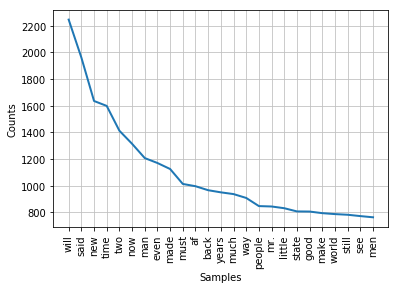

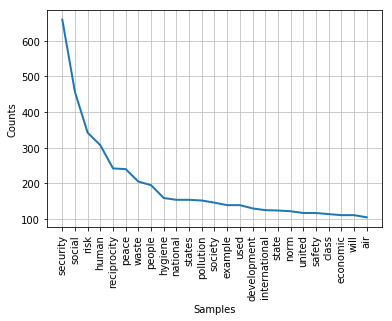

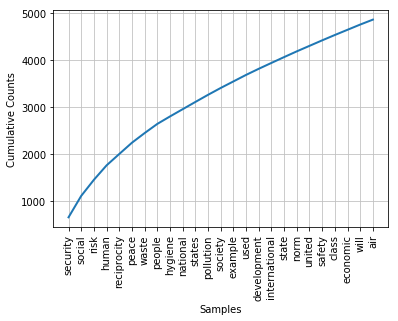

(True, True, True)

In [46]:
RC.plot(25), SC.plot(25), SC.plot(25, cumulative = True)

In [47]:
SC.tabulate(7)

   security      social        risk       human reciprocity       peace       waste 
        659         456         342         307         242         240         205 


True

In [48]:
SC.get_top_frequents(50)

[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154),
 ('states', 154),
 ('pollution', 152),
 ('society', 146),
 ('example', 139),
 ('used', 139),
 ('development', 130),
 ('international', 125),
 ('state', 124),
 ('norm', 122),
 ('united', 117),
 ('safety', 117),
 ('class', 114),
 ('economic', 111),
 ('will', 111),
 ('air', 105),
 ('group', 105),
 ('individuals', 104),
 ('environmental', 102),
 ('health', 101),
 ('individual', 99),
 ('management', 99),
 ('theory', 98),
 ('power', 95),
 ('world', 94),
 ('use', 90),
 ('water', 88),
 ('war', 87),
 ('political', 87),
 ('behaviour', 87),
 ('control', 86),
 ('norms', 85),
 ('time', 84),
 ('order', 83),
 ('countries', 83),
 ('environment', 81),
 ('anti', 81),
 ('military', 80),
 ('system', 78),
 ('within', 77),
 ('different', 76)]

In [49]:
SC.get_least_frequents(50)

[('whatley', 3),
 ('constrained', 3),
 ('olson', 3),
 ('spelke', 3),
 ('colleague', 3),
 ('wiley', 3),
 ('ed', 3),
 ('glenview', 3),
 ('scott', 3),
 ('foresman', 3),
 ('guinea', 3),
 ('literal', 3),
 ('contributors', 3),
 ('conceptual', 3),
 ('philosophers', 3),
 ('becker', 3),
 ('similarity', 3),
 ('perverse', 3),
 ('republic', 3),
 ('turns', 3),
 ('disadvantaged', 3),
 ('altogether', 3),
 ('unjust', 3),
 ('fairness', 3),
 ('commitment', 3),
 ('rawls', 3),
 ('transformed', 3),
 ('mutualism', 3),
 ('managerial', 3),
 ('helpers', 3),
 ('fitness', 3),
 ('stakes', 3),
 ('retrieved', 3),
 ('maint', 3),
 ('gifting', 3),
 ('vs', 3),
 ('marcel', 3),
 ('marshall', 3),
 ('vice', 3),
 ('dyadic', 3),
 ('closeness', 3),
 ('origins', 3),
 ('critiques', 3),
 ('drew', 3),
 ('tadjbakhsh', 3),
 ('participation', 3),
 ('centered', 3),
 ('ireland', 3),
 ('apolitical', 3),
 ('dorn', 3)]

### 5.1 Number of unique words after cleaning 

In [50]:
n_Spec = SC.get_count_uniques()
n_Ref = RC.get_count_uniques()
print('Number of unique words: Specific = {}, Reference = {}'.format(n_Spec, n_Ref))

Number of unique words: Specific = 3614, Reference = 19897


### 5.2  Total word counts after cleaning 

In [51]:
s_Spec = SC.get_size()
s_Ref =  RC.get_size()
print('Total of words: Specific = {}, Reference = {}'.format(s_Spec, s_Ref))

Total of words: Specific = 42920, Reference = 478838


### 5.3 Displaying ordered list of terms

List of words in the corpus in case, for a visual inspection. Such inspections will be used both to improve tokenization as well as filtering.

In [52]:
SC.get_top_frequents(n_Spec)

[('security', 659),
 ('social', 456),
 ('risk', 342),
 ('human', 307),
 ('reciprocity', 242),
 ('peace', 240),
 ('waste', 205),
 ('people', 195),
 ('hygiene', 159),
 ('national', 154),
 ('states', 154),
 ('pollution', 152),
 ('society', 146),
 ('example', 139),
 ('used', 139),
 ('development', 130),
 ('international', 125),
 ('state', 124),
 ('norm', 122),
 ('united', 117),
 ('safety', 117),
 ('class', 114),
 ('economic', 111),
 ('will', 111),
 ('air', 105),
 ('group', 105),
 ('individuals', 104),
 ('environmental', 102),
 ('health', 101),
 ('individual', 99),
 ('management', 99),
 ('theory', 98),
 ('power', 95),
 ('world', 94),
 ('use', 90),
 ('water', 88),
 ('war', 87),
 ('political', 87),
 ('behaviour', 87),
 ('control', 86),
 ('norms', 85),
 ('time', 84),
 ('order', 83),
 ('countries', 83),
 ('environment', 81),
 ('anti', 81),
 ('military', 80),
 ('system', 78),
 ('within', 77),
 ('different', 76),
 ('based', 76),
 ('return', 76),
 ('practices', 75),
 ('include', 72),
 ('two', 72),

### 5.4 Set of terms/words that occure in both corpus.

In [53]:
common_words = SC.intersection(RC)

In [54]:
pp.pprint(common_words)

['security',
 'uses',
 'see',
 'women',
 'army',
 'associated',
 'national',
 'avoiding',
 'war',
 'work',
 'freedom',
 'against',
 'potential',
 'harm',
 'unwanted',
 'change',
 'external',
 'forces',
 'persons',
 'social',
 'groups',
 'objects',
 'institutions',
 'phenomenon',
 'vulnerable',
 'environment',
 'refugees',
 'insecurity',
 'iraq',
 'arrive',
 'island',
 'supported',
 'mostly',
 'refers',
 'protection',
 'hostile',
 'wide',
 'range',
 'senses',
 'example',
 'absence',
 'want',
 'presence',
 'essential',
 'good',
 'food',
 'damage',
 'secure',
 'foundations',
 'line',
 'room',
 'cell',
 'state',
 'mind',
 'emotional',
 'term',
 'used',
 'refer',
 'acts',
 'systems',
 'whose',
 'purpose',
 'provide',
 'context',
 'capabilities',
 'effects',
 'contested',
 'approaches',
 'examples',
 'computer',
 'corporate',
 'home',
 'human',
 'perceptions',
 'concepts',
 'word',
 'english',
 'language',
 'century',
 'derived',
 'latin',
 'meaning',
 'anxiety',
 'without',
 'care',
 'focus

 'anger',
 'greed',
 'ego',
 'naturally',
 'prefer',
 'keep',
 'accordance',
 'old',
 'students',
 'explains',
 'hands',
 'performing',
 'religious',
 'services',
 'places',
 'discussed',
 'existence',
 'living',
 'entities',
 'followed',
 'regulation',
 'seven',
 'rivers',
 'invoke',
 'daily',
 'bath',
 'waters',
 'taken',
 'seek',
 'wash',
 'feet',
 'taking',
 'required',
 'thing',
 'follow',
 'pollution',
 'river',
 'homes',
 'preparing',
 'year',
 'keeping',
 'house',
 'gestures',
 'goddess',
 'stay',
 'houses',
 'dedicated',
 'rest',
 'preparation',
 'gives',
 'deeper',
 'activities',
 'give',
 'merely',
 'frequently',
 'jurisprudence',
 'discuss',
 'truly',
 'loves',
 'turn',
 'love',
 'islamic',
 'matters',
 'subjects',
 'taught',
 'book',
 'use',
 'recommended',
 'times',
 'performed',
 'sin',
 'special',
 'al',
 'germ',
 'come',
 'mean',
 'effort',
 'remove',
 'hazardous',
 'materials',
 'reaction',
 'excessive',
 'began',
 'occur',
 'david',
 'forth',
 'hypothesis',
 'british

 'regulatory',
 'automobile',
 'centers',
 'patient',
 'ship',
 'statement',
 'artist',
 'peter',
 'restraint',
 'treaties',
 'escalation',
 'talks',
 'avoidance',
 'listening',
 'peaceful',
 'disposition',
 'tranquility',
 'uncertainties',
 'possibly',
 'asset',
 'assisting',
 'resolution',
 'generosity',
 'improved',
 'notions',
 'previously',
 'buddhism',
 'injustice',
 'periods',
 'pacifism',
 'league',
 'olympic',
 'nobel',
 'prize',
 'rhodes',
 'scholarships',
 'fellowships',
 'belt',
 'bartlett',
 'news',
 'sydney',
 'monuments',
 'solidarity',
 'weapons',
 'measurement',
 'treaty',
 'translation',
 'hebrew',
 'usual',
 'arabic',
 'equity',
 'languages',
 'dietrich',
 'maps',
 'interpretations',
 'energetic',
 'truth',
 'image',
 'jesus',
 'forgiveness',
 'path',
 'numerous',
 'october',
 'hearts',
 'assured',
 'told',
 'degrees',
 'suffering',
 'eliminate',
 'texts',
 'atmosphere',
 'earth',
 'let',
 'unity',
 'observe',
 'cruel',
 'victory',
 'wheels',
 'benevolence',
 'horses

In [55]:
#CHANGED HZ
print('Number of the SC/RC common words: {}'.format(len(common_words)))

Number of the SC/RC common words: 3120


### 5.5 Set of terms/words that occur in the sample but not in the reference corpus.

This specific set will be incorporated later below. 

In [56]:
input_specifics = SC.difference(RC)

In [57]:
print(len(input_specifics))

494


In [58]:
pp.pprint(input_specifics)

{'abatement': 3,
 'ablution': 3,
 'abolished': 4,
 'aboriginal': 3,
 'activists': 3,
 'adaptive': 3,
 'adsorb': 3,
 'advocates': 7,
 'aerobic': 3,
 'allah': 7,
 'allergies': 5,
 'altruism': 15,
 'altruistic': 6,
 'amish': 3,
 'anaerobic': 6,
 'anemones': 4,
 'anglo': 4,
 'ansi': 3,
 'anthropological': 4,
 'anthropologists': 6,
 'anti': 81,
 'antibacterial': 6,
 'antimicrobial': 4,
 'antisocial': 10,
 'apolitical': 3,
 'aquifer': 3,
 'ar': 3,
 'asbo': 3,
 'asepsis': 10,
 'aseptic': 4,
 'aspd': 10,
 'atopic': 3,
 'attenuation': 5,
 'aucam': 4,
 'aureus': 3,
 'averse': 3,
 'aversion': 5,
 'bakar': 4,
 'banned': 5,
 'banning': 3,
 'barter': 5,
 'basel': 4,
 'becker': 3,
 'behaviors': 16,
 'behavioural': 13,
 'behaviours': 30,
 'benevolent': 5,
 'bhagavatam': 3,
 'biases': 7,
 'bibliography': 3,
 'biodegradable': 3,
 'biodiversity': 4,
 'bioremediation': 11,
 'bleach': 6,
 'bourgeoisie': 16,
 'bpt': 7,
 'bronisaw': 3,
 'bs': 6,
 'canals': 6,
 'capitalists': 9,
 'caregivers': 4,
 'catalytic'

# *from this point down has not been revised yet*
Bulent

## 7. Stemming

In [59]:
stemmer = PorterStemmer()
input_wset_stems = {k: stemmer.stem(k) for k in SC.list_terms()}
common_wset_stems = {k: stemmer.stem(k) for k in common_words}
pp.pprint(common_wset_stems)

{'abilities': 'abil',
 'ability': 'abil',
 'able': 'abl',
 'absence': 'absenc',
 'absorbed': 'absorb',
 'academic': 'academ',
 'accelerate': 'acceler',
 'accept': 'accept',
 'acceptable': 'accept',
 'acceptance': 'accept',
 'accepted': 'accept',
 'access': 'access',
 'accident': 'accid',
 'accidents': 'accid',
 'accompanied': 'accompani',
 'accordance': 'accord',
 'according': 'accord',
 'accordingly': 'accordingli',
 'account': 'account',
 'accounts': 'account',
 'accreditation': 'accredit',
 'accumulation': 'accumul',
 'accuracy': 'accuraci',
 'achieve': 'achiev',
 'achieved': 'achiev',
 'achievement': 'achiev',
 'achieving': 'achiev',
 'acid': 'acid',
 'acquired': 'acquir',
 'across': 'across',
 'act': 'act',
 'acting': 'act',
 'action': 'action',
 'actions': 'action',
 'activated': 'activ',
 'active': 'activ',
 'activities': 'activ',
 'activity': 'activ',
 'actor': 'actor',
 'actors': 'actor',
 'acts': 'act',
 'actual': 'actual',
 'actually': 'actual',
 'added': 'ad',
 'adding': 'a

 'chicago': 'chicago',
 'child': 'child',
 'childhood': 'childhood',
 'children': 'children',
 'china': 'china',
 'chinese': 'chines',
 'chlorine': 'chlorin',
 'choice': 'choic',
 'choices': 'choic',
 'choose': 'choos',
 'christian': 'christian',
 'christianity': 'christian',
 'chronic': 'chronic',
 'church': 'church',
 'circle': 'circl',
 'circumstance': 'circumst',
 'circumstances': 'circumst',
 'citation': 'citat',
 'cited': 'cite',
 'cities': 'citi',
 'citizens': 'citizen',
 'city': 'citi',
 'civil': 'civil',
 'civilian': 'civilian',
 'civilization': 'civil',
 'claim': 'claim',
 'claimed': 'claim',
 'claims': 'claim',
 'clarification': 'clarif',
 'class': 'class',
 'classes': 'class',
 'classical': 'classic',
 'classification': 'classif',
 'classified': 'classifi',
 'claude': 'claud',
 'clean': 'clean',
 'cleaned': 'clean',
 'cleaner': 'cleaner',
 'cleaners': 'cleaner',
 'cleaning': 'clean',
 'clear': 'clear',
 'clearly': 'clearli',
 'client': 'client',
 'climate': 'climat',
 'clin

 'granular': 'granular',
 'gratitude': 'gratitud',
 'great': 'great',
 'greater': 'greater',
 'greatest': 'greatest',
 'greatly': 'greatli',
 'greece': 'greec',
 'greed': 'greed',
 'greek': 'greek',
 'green': 'green',
 'grew': 'grew',
 'ground': 'ground',
 'group': 'group',
 'groups': 'group',
 'growing': 'grow',
 'grown': 'grown',
 'growth': 'growth',
 'guarantee': 'guarante',
 'guard': 'guard',
 'guidance': 'guidanc',
 'guide': 'guid',
 'guilt': 'guilt',
 'guinea': 'guinea',
 'gulf': 'gulf',
 'habit': 'habit',
 'habits': 'habit',
 'hair': 'hair',
 'half': 'half',
 'hand': 'hand',
 'handle': 'handl',
 'handles': 'handl',
 'handling': 'handl',
 'hands': 'hand',
 'happen': 'happen',
 'hard': 'hard',
 'hardware': 'hardwar',
 'harm': 'harm',
 'harmful': 'harm',
 'harmony': 'harmoni',
 'harold': 'harold',
 'hazard': 'hazard',
 'hazardous': 'hazard',
 'hazards': 'hazard',
 'head': 'head',
 'health': 'health',
 'healthy': 'healthi',
 'heart': 'heart',
 'hearts': 'heart',
 'heat': 'heat',
 'h

 'part': 'part',
 'participants': 'particip',
 'participation': 'particip',
 'particle': 'particl',
 'particles': 'particl',
 'particular': 'particular',
 'particularly': 'particularli',
 'particulate': 'particul',
 'parties': 'parti',
 'partly': 'partli',
 'partner': 'partner',
 'partners': 'partner',
 'parts': 'part',
 'party': 'parti',
 'pass': 'pass',
 'passed': 'pass',
 'past': 'past',
 'path': 'path',
 'patient': 'patient',
 'patients': 'patient',
 'pattern': 'pattern',
 'patterns': 'pattern',
 'paul': 'paul',
 'pay': 'pay',
 'paying': 'pay',
 'pays': 'pay',
 'peace': 'peac',
 'peaceful': 'peac',
 'peers': 'peer',
 'penalties': 'penalti',
 'people': 'peopl',
 'peoples': 'peopl',
 'per': 'per',
 'perceived': 'perceiv',
 'percent': 'percent',
 'perception': 'percept',
 'perceptions': 'percept',
 'perform': 'perform',
 'performance': 'perform',
 'performed': 'perform',
 'performing': 'perform',
 'perhaps': 'perhap',
 'period': 'period',
 'periods': 'period',
 'periphery': 'peripheri

 'sustain': 'sustain',
 'sustained': 'sustain',
 'sweden': 'sweden',
 'sydney': 'sydney',
 'symbol': 'symbol',
 'symbolic': 'symbol',
 'system': 'system',
 'systematic': 'systemat',
 'systemic': 'system',
 'systems': 'system',
 'table': 'tabl',
 'taboo': 'taboo',
 'tackle': 'tackl',
 'take': 'take',
 'taken': 'taken',
 'takes': 'take',
 'taking': 'take',
 'talk': 'talk',
 'talks': 'talk',
 'tap': 'tap',
 'tapping': 'tap',
 'target': 'target',
 'task': 'task',
 'taught': 'taught',
 'tax': 'tax',
 'taylor': 'taylor',
 'team': 'team',
 'teams': 'team',
 'technical': 'technic',
 'technique': 'techniqu',
 'techniques': 'techniqu',
 'technological': 'technolog',
 'technology': 'technolog',
 'temperature': 'temperatur',
 'temperatures': 'temperatur',
 'template': 'templat',
 'tend': 'tend',
 'tendencies': 'tendenc',
 'tendency': 'tendenc',
 'tends': 'tend',
 'tension': 'tension',
 'tensions': 'tension',
 'term': 'term',
 'terminology': 'terminolog',
 'terms': 'term',
 'territory': 'territori'

## 8. Handling input specific term set

### 8.1 Identfying matching stems with common words. 

Note that the frequency counts are transferred accordingly.

In [60]:
specifics = {}
for k,v in input_specifics.items():
    stem = input_wset_stems[k]
    words = [w for w,s in common_wset_stems.items() if s == stem]
    if words:
        w = words[0]
        SC.tf_dist[w] += input_specifics[k]
        continue
    specifics[k] = v
# Removing the words with matching stems from the specific set.
print("Reduction due to stemm matches: ", len(input_specifics) - len(specifics))
input_specifics = specifics

Reduction due to stemm matches:  112


### 8.2 Removing open-maker specific terms.

In [61]:
with open("data/specifics_openmaker.txt", "r") as f:
    SPECIFICS_OPENMAKER = set(f.read().strip().split("\n"))
om_specific_stems = {stemmer.stem(k):k for k in SPECIFICS_OPENMAKER}
pp.pprint(om_specific_stems)

{'3-d': '3-d',
 '3d': '3d',
 'abat': 'abatement',
 'afford': 'affordable',
 'agenda21': 'agenda21',
 'anarch': 'anarchism',
 'autonom': 'autonomous',
 'biodiesel': 'biodiesel',
 'biodivers': 'biodiversity',
 'biofuel': 'biofuel',
 'bioga': 'biogas',
 'biomass': 'biomass',
 'biospher': 'biosphere',
 'bricolag': 'bricolage',
 'brundtland': 'brundtland',
 'c2c': 'c2c',
 'cad': 'cad',
 'cap-and-trad': 'cap-and-trade',
 'carfre': 'carfree',
 'cdm': 'cdm',
 'christensen': 'christensen',
 'co-creat': 'co-creation',
 'co-develop': 'co-develop',
 'co-invent': 'co-invention',
 'co-inventor': 'co-inventor',
 'coextinct': 'coextinction',
 'cognit': 'cognition',
 'commons-bas': 'commons-based',
 'computer-aid': 'computer-aided',
 'conferenc': 'conferencing',
 'consortium': 'consortium',
 'constraint': 'constraints',
 'construct': 'construct',
 'copyleft': 'copyleft',
 'copyright': 'copyright',
 'cradle-to-cradl': 'cradle-to-cradle',
 'crowdsourc': 'crowdsourcing',
 'crowdwork': 'crowdworker',
 'cuv

In [62]:
specific_wset_dirty = {}
specific_wset_stems_selected = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in om_specific_stems.keys():
        if k in specific_wset_stems_selected.keys():
            specific_wset_stems_selected[stem] += v
        else:
            specific_wset_stems_selected[stem] = v
        continue
    if v > 10:
        specific_wset_dirty[k] = v
        
input_specifics = specific_wset_dirty

In [63]:
# The set of stems to be added to the set with makerness counts.
pp.pprint(specific_wset_stems_selected)

{'abat': 3,
 'biodivers': 4,
 'cognit': 7,
 'constraint': 3,
 'displaystyl': 3,
 'ecolog': 3,
 'ecosystem': 12,
 'fossil': 5,
 'infrastructur': 11,
 'internet': 8,
 'iso': 37,
 'landfil': 6,
 'lifestyl': 4,
 'onlin': 4,
 'organis': 6,
 'programm': 4,
 'racism': 10,
 'recycl': 5,
 'reus': 6,
 'softwar': 8}


### 8.3 Remaining frequent input specifics
The manual checking can help to determine what should go into "specifics_openmaker.txt"

In [64]:
print(len(input_specifics))
pp.pprint(sorted(input_specifics))

30
['altruism',
 'anti',
 'bioremediation',
 'bourgeoisie',
 'cleanliness',
 'cleanroom',
 'cleanrooms',
 'cyber',
 'deviance',
 'epa',
 'gandhi',
 'gender',
 'groundwater',
 'incineration',
 'inequality',
 'kin',
 'marxism',
 'microbes',
 'pathogens',
 'pyrolysis',
 'remediation',
 'situ',
 'stratification',
 'surgical',
 'terrorism',
 'theorists',
 'uk',
 'usa',
 'weber',
 'worldwide']


In [65]:
specific_wset_stems = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in specific_wset_stems.keys():
        specific_wset_stems[stem].append((k,v))
    else:
        specific_wset_stems[stem] = [(k,v)]
pp.pprint(specific_wset_stems)

{'altruism': [('altruism', 15)],
 'anti': [('anti', 81)],
 'bioremedi': [('bioremediation', 11)],
 'bourgeoisi': [('bourgeoisie', 16)],
 'cleanli': [('cleanliness', 66)],
 'cleanroom': [('cleanrooms', 15), ('cleanroom', 46)],
 'cyber': [('cyber', 11)],
 'devianc': [('deviance', 13)],
 'epa': [('epa', 15)],
 'gandhi': [('gandhi', 14)],
 'gender': [('gender', 23)],
 'groundwat': [('groundwater', 22)],
 'inciner': [('incineration', 15)],
 'inequ': [('inequality', 18)],
 'kin': [('kin', 12)],
 'marxism': [('marxism', 12)],
 'microb': [('microbes', 13)],
 'pathogen': [('pathogens', 21)],
 'pyrolysi': [('pyrolysis', 19)],
 'remedi': [('remediation', 49)],
 'situ': [('situ', 18)],
 'stratif': [('stratification', 65)],
 'surgic': [('surgical', 13)],
 'terror': [('terrorism', 16)],
 'theorist': [('theorists', 12)],
 'uk': [('uk', 18)],
 'usa': [('usa', 12)],
 'weber': [('weber', 16)],
 'worldwid': [('worldwide', 12)]}


## 9. Computing representation power of common words.

In [68]:
# combine
word = []
freq = []
score = []
# common_words = [w[0] for w in common_words]
nSpec = 1.0 * n_Spec
nRef = 1.0 * n_Ref
for w in common_words:
    # Consider only words whose charcater length is larger than 1
    if len(w) > 1:
        # Log likelihood scores are computed:
        print(w, SC.tf_dist[w], RC.tf_dist[w])
        s = log((SC.tf_dist[w] / nSpec) / (RC.tf_dist[w] / nRef))
        f = SC.tf_dist[w]
        word.append(w)
        freq.append(f)
        score.append(s)

security 659 91
uses 24 59
see 64 772
women 47 195
army 6 132
associated 38 61
national 154 375
avoiding 6 11
war 87 464
work 56 762
freedom 48 128
against 45 627
potential 47 67
harm 21 25
unwanted 7 6
change 42 240
external 44 43
forces 37 175
persons 22 121
social 456 380
groups 66 125
objects 5 65
institutions 30 98
phenomenon 8 35
vulnerable 11 14
environment 81 43
refugees 4 7
insecurity 17 5
iraq 4 3
arrive 3 24
island 5 167
supported 8 54
mostly 9 44
refers 55 18
protection 41 68
hostile 9 19
wide 16 125
range 28 157
senses 3 15
example 139 292
absence 20 53
want 22 328
presence 12 76
essential 11 81
good 42 806
food 71 147
damage 22 33
secure 15 30
foundations 3 14
line 8 298
room 15 384
cell 3 65
state 124 807
mind 11 325
emotional 8 68
term 68 79
used 139 611
refer 12 27
acts 21 39
systems 70 129
whose 16 251
purpose 12 149
provide 33 216
context 27 35
capabilities 14 22
effects 37 108
contested 5 3
approaches 22 25
examples 36 53
computer 24 13
corporate 19 19
home 55 547
h

defects 5 13
anger 8 48
greed 4 3
ego 4 13
naturally 9 70
prefer 3 27
keep 17 264
accordance 3 20
old 16 661
students 11 213
explains 6 20
hands 28 289
performing 4 17
religious 11 165
services 31 139
places 16 100
discussed 4 65
existence 16 107
living 14 194
entities 5 11
followed 11 172
regulation 17 14
seven 6 113
rivers 4 17
invoke 5 4
daily 9 122
bath 9 26
waters 5 42
taken 14 281
seek 13 69
wash 15 33
feet 3 283
taking 16 175
required 17 182
thing 5 333
follow 12 97
pollution 190 6
river 6 165
homes 11 62
preparing 4 22
year 19 658
keeping 4 60
house 15 591
gestures 3 7
goddess 5 3
stay 8 113
houses 4 83
dedicated 4 23
rest 9 163
preparation 8 54
gives 11 114
deeper 4 37
activities 28 115
give 25 389
merely 10 135
frequently 8 91
jurisprudence 4 3
discuss 6 28
truly 4 57
loves 3 19
turn 17 233
love 9 231
islamic 9 3
matters 6 64
subjects 4 81
taught 3 50
book 12 197
use 90 591
recommended 7 46
times 30 300
performed 7 35
sin 3 53
special 12 250
al 8 25
germ 6 3
come 16 630
mean 

obvious 6 92
european 21 61
ruled 3 31
marry 3 18
largely 9 68
organizations 29 61
birth 10 66
formed 4 76
rebuild 3 5
england 6 154
transition 3 32
ill 4 26
increases 14 72
emerges 3 9
immediate 11 81
reasons 4 103
motive 3 22
profits 4 21
says 3 200
french 8 139
organization 43 128
pays 9 17
lived 3 115
red 9 197
revolutionary 3 21
movement 18 128
fourth 4 74
bourgeois 6 3
entire 8 149
intervention 55 20
highest 7 63
instrument 7 47
repression 3 6
movements 6 47
longer 12 193
commercial 13 61
aim 6 37
eventually 11 52
elected 4 33
minimum 7 68
weight 3 91
depending 10 32
voter 3 4
historically 7 16
legislation 12 46
ethnic 22 13
gradually 3 51
suffrage 4 5
directly 12 141
behalf 4 21
forced 6 81
labour 11 4
paid 8 145
productivity 9 17
supportive 4 7
wages 5 42
equilibrium 10 13
precisely 4 48
medium 3 45
employment 5 47
drives 4 6
impossible 4 84
full 9 230
knowledge 14 145
indirectly 4 17
regions 12 40
encouraged 5 29
raw 11 43
clarification 6 5
monopolies 3 5
happen 3 63
defeat 4 

concentration 15 47
sizes 3 12
ordinary 5 72
rooms 3 55
concentrations 9 9
volumes 3 44
requiring 7 16
counts 4 14
recovery 28 29
window 4 119
cleaners 20 8
los 3 51
angeles 3 47
california 5 65
june 3 99
cleaned 5 16
deposit 3 9
details 4 57
towels 6 11
wet 4 53
colorado 3 13
asian 3 10
surfaces 23 28
respiratory 9 17
kitchen 3 90
toilet 10 13
laundry 8 5
ear 13 29
sleep 14 65
medieval 6 18
hot 3 130
drawn 3 70
medicine 7 30
organisms 20 7
soil 46 54
prevents 3 10
infection 33 8
sterilization 6 5
dressing 3 22
injuries 3 11
disposal 46 20
linen 9 6
mid 3 3
refined 3 6
infected 3 4
foods 10 51
toilets 9 4
species 20 37
bacteria 19 8
utensils 3 3
dealing 7 43
sanitation 17 11
diarrhea 3 7
viable 6 5
heat 9 97
laundering 7 7
bed 5 127
tap 3 18
caring 3 10
ash 5 11
sand 3 28
tissues 3 13
temperature 13 135
handles 3 9
contaminated 36 3
infections 5 5
soiled 3 7
fabric 3 15
hospitals 3 20
immunity 6 7
cycles 3 7
thermal 19 33
oxygen 11 44
detergents 3 4
ingredients 4 9
liquid 16 48
powder 

In [70]:
m = pd.Series(score)
f = pd.Series(freq)
k = pd.Series(word)
stem = k.apply(stemmer.stem)
scoring = len(k) * ['common']
df_common = pd.DataFrame({'Word':k, 'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_common.sort_values(by='Score', ascending=False, inplace = True)
df_common.reset_index(inplace=True, drop=True)
df_common.head(50)

,Score,Stem,Tf,Type,Word
0,5.737040,hygien,169,common,hygiene
1,5.474676,behaviour,130,common,behaviour
2,5.375705,reciproc,314,common,reciprocal
3,5.161018,pollut,190,common,pollution
4,5.028990,contamin,111,common,contamination
5,4.701486,global,80,common,global
6,4.498962,humanitarian,49,common,humanitarian
7,4.441975,environment,108,common,environmental
8,4.413804,citat,75,common,citation
9,4.207190,norm,122,common,norm


### 9.1 Computing makerness of specific terms

In [71]:
max_score = df_common.iloc[0,0]
threshold_score = 1.0
mean_w = df_common.Score[df_common.Score > threshold_score].mean()
mean_f = df_common.Tf[df_common.Score > threshold_score].mean()
print(max_score, threshold_score, mean_w, mean_f)

5.73704020068 1.0 1.7227550992011733 18.603591160220994


In [72]:
def compute_speficif_score(f, maxw=10, minw=1, mean_w=3.0, mean_f=25.0):
    return(max(min((f / mean_f) * mean_w, maxw), minw))
compute_speficif_score(mean_w, max_score, threshold_score, mean_w, mean_f)

1.0

In [73]:
stem = []
freq = []
score = []
for k, v in specific_wset_stems_selected.items():
    s = compute_speficif_score(v, max_score, threshold_score, mean_w, mean_f)
    stem.append(k)
    freq.append(v)
    score.append(s)

## 10. Tabulating the results and generating the output file

In [74]:
m = pd.Series(score)
f = pd.Series(freq)
stem = pd.Series(stem)
scoring = len(m) * ['specific']
df_exclusive= pd.DataFrame({'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_exclusive.sort_values(by='Score', ascending=False, inplace = True)
df_exclusive.reset_index(inplace=True, drop=True)
df_exclusive.head(20)

,Score,Stem,Tf,Type
0,3.426324,iso,37,specific
1,1.111240,ecosystem,12,specific
2,1.018637,infrastructur,11,specific
3,1.000000,cognit,7,specific
4,1.000000,abat,3,specific
5,1.000000,recycl,5,specific
6,1.000000,landfil,6,specific
7,1.000000,reus,6,specific
8,1.000000,displaystyl,3,specific
9,1.000000,onlin,4,specific


In [75]:
df_makerness = df_common.append(df_exclusive, ignore_index=True)
df_makerness.sort_values(by='Score', ascending=False, inplace = True)
df_makerness.reset_index(inplace=True, drop=True)
df_makerness.head(25)

,Score,Stem,Tf,Type,Word
0,5.737040,hygien,169,common,hygiene
1,5.474676,behaviour,130,common,behaviour
2,5.375705,reciproc,314,common,reciprocal
3,5.161018,pollut,190,common,pollution
4,5.028990,contamin,111,common,contamination
5,4.701486,global,80,common,global
6,4.498962,humanitarian,49,common,humanitarian
7,4.441975,environment,108,common,environmental
8,4.413804,citat,75,common,citation
9,4.207190,norm,122,common,norm


In [76]:
df_makerness.tail(10)

,Score,Stem,Tf,Type,Word
3130,-2.751082,man,14,common,man
3131,-2.760154,probabl,3,common,probably
3132,-2.826846,cours,5,common,course
3133,-2.841081,feet,3,common,feet
3134,-2.886838,knew,4,common,knew
3135,-2.931399,told,4,common,told
3136,-2.963955,turn,3,common,turned
3137,-2.978690,think,4,common,think
3138,-3.042243,said,17,common,said
3139,-3.245367,head,3,common,head


In [68]:
OUTPUT_FOLDER = "./output/"
csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + ".csv"
with open(csvfile_name, 'w') as csvfile:
    #thewriter = csv.writer(csvfile, delimiter=',')
    #for k,v in sorted(makerness.items(), key=lambda x:x[1][0], reverse=True): thewriter.writerow([k,v[0],v[1]])
    df_makerness.to_csv(csvfile_name)

### 10.1 Outputfile name for the theme

In [69]:
print(csvfile_name)

./output/schwartz_Security.csv


In [70]:
#%connect_info

In [71]:
print('SUMMARY')
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))
print('Length of the corpus in terms of characters,{}'.format(len(fcorpus_text)))
print('Term counts: {}\nCorpus,{}\nRef Corpus,{}'.format(CURRENT_THEME.capitalize(), len(SPECIFIC_CORPUS), len(REFERENCE_CORPUS)))
print("Corpus Reference: reduction due to rare terms,{}".format(len(Tf_R) - len(Tf_Rn)))
print('Number of unique words:\nSpecific,{}\nReference,{}'.format(n_Spec, n_Ref))
print('Total of words:\nSpecific,{}\nReference,{}'.format(s_Spec, s_Ref))
print('Number of the SC/RC common words,{}'.format(len(common_words)))
print('Max score, {}\nThreshold score, {}\nMeanw, {}\nMeanf, {}'.format(max_score, threshold_score, mean_w, mean_f))

SUMMARY
The output file prefix: Security
Length of the corpus in terms of characters,576130
Term counts: Security
Corpus,86706
Ref Corpus,1161192
Corpus Reference: reduction due to rare terms,0
Number of unique words:
Specific,3614
Reference,19897
Total of words:
Specific,42920
Reference,478838
Number of the SC/RC common words,3120
Max score, 5.7370402006820385
Threshold score, 1.0
Meanw, 1.7227550992011733
Meanf, 18.603591160220994
